# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from scipy import ndimage
%matplotlib inline 

# Reading the given image file

In [2]:
faces = pd.read_csv("faces.dat", delim_whitespace=True, header=None)
faces

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,75.0,83.0,83.0,74.0,81.0,76.0,75.0,64.0,60.0,64.0,...,41.0,41.0,40.0,39.0,38.0,39.0,41.0,42.0,40.0,38.0
1,110.0,108.0,120.0,127.0,130.0,142.0,162.0,169.0,171.0,166.0,...,38.0,36.0,37.0,36.0,34.0,37.0,39.0,35.0,33.0,37.0
2,77.0,75.0,65.0,53.0,49.0,50.0,47.0,43.0,48.0,64.0,...,38.0,38.0,40.0,41.0,38.0,37.0,37.0,37.0,38.0,37.0
3,48.0,53.0,58.0,55.0,57.0,52.0,45.0,34.0,20.0,29.0,...,154.0,163.0,168.0,175.0,177.0,177.0,177.0,178.0,180.0,179.0
4,121.0,116.0,119.0,119.0,120.0,127.0,141.0,141.0,141.0,140.0,...,44.0,43.0,43.0,46.0,40.0,48.0,44.0,47.0,40.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,97.0,102.0,104.0,95.0,93.0,93.0,95.0,99.0,103.0,103.0,...,41.0,41.0,37.0,41.0,41.0,37.0,44.0,44.0,40.0,33.0
396,89.0,88.0,88.0,89.0,88.0,87.0,88.0,85.0,81.0,83.0,...,116.0,107.0,97.0,86.0,89.0,103.0,116.0,123.0,129.0,133.0
397,121.0,119.0,113.0,114.0,118.0,121.0,125.0,129.0,135.0,140.0,...,43.0,41.0,40.0,40.0,39.0,42.0,42.0,41.0,45.0,46.0
398,52.0,49.0,51.0,55.0,61.0,68.0,73.0,73.0,73.0,69.0,...,128.0,121.0,117.0,119.0,128.0,136.0,141.0,143.0,144.0,146.0


# Printing the 100th image in file

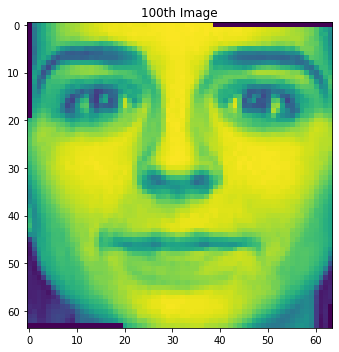

In [3]:
imgarray = np.array(faces.iloc[[99]])
reshape_100_image = imgarray.reshape(64,64)
fig, (ax1) = plt.subplots(nrows=1, figsize=(5,5))
rotated_img = ndimage.rotate(reshape_100_image, 270)    
ax1.imshow(rotated_img)
ax1.set_title("100th Image")
plt.tight_layout()
plt.show()

# Printing 100th image by removing the means

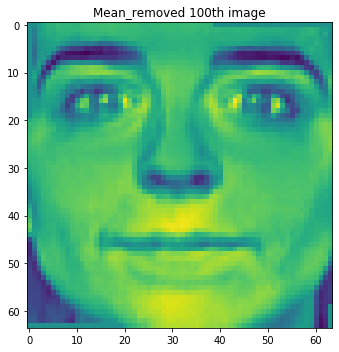

In [4]:
imgs = np.array(faces)
#imgs -= imgs.mean(0)
imgs = imgs - np.mean(imgs, axis=0)
imgs = pd.DataFrame(imgs)
imgarray = np.array(imgs.iloc[[99]])
mean_remove_100_image = imgarray.reshape(64,64)
fig, (ax1) = plt.subplots(nrows=1, figsize=(5,5))
rotated_img_mean = ndimage.rotate(mean_remove_100_image, 270)   
ax1.imshow(rotated_img_mean)
ax1.set_title("Mean_removed 100th image")
plt.tight_layout()
plt.show()

# Plot of eigen values after fitting the PCA

           0
0    1103356
1     648406
2     369223
3     231596
4     167261
..       ...
395      100
396       99
397       92
398       75
399        0

[400 rows x 1 columns]


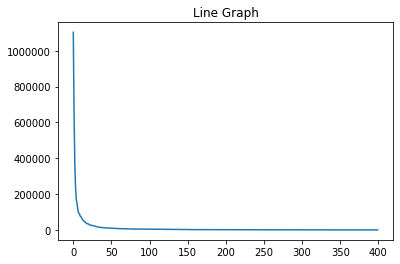

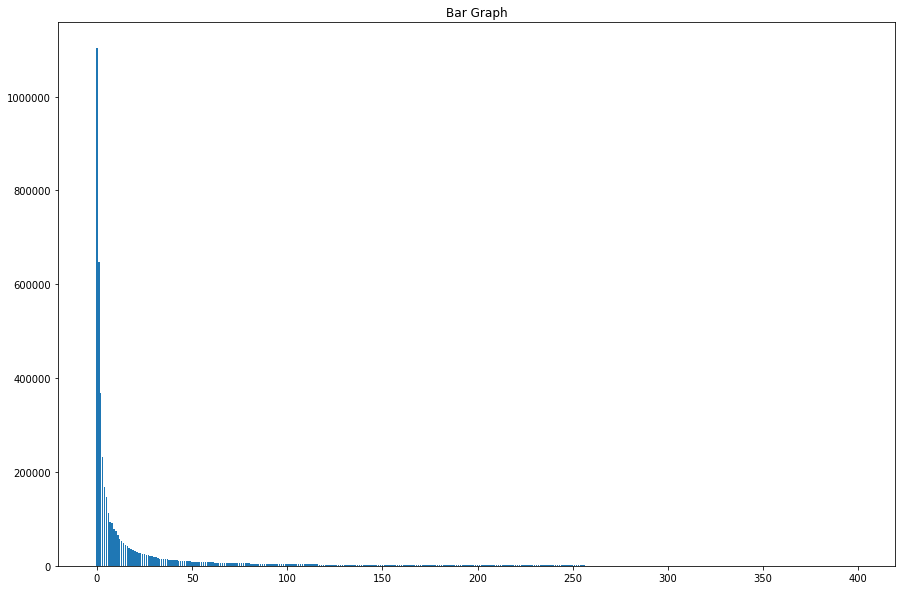

In [5]:
pca_images = PCA()
pca_images.fit(imgs)
eigen_values = pca_images.explained_variance_
eigen_values = eigen_values.astype(int)
principal_components = np.arange(0,400,1)

plt.plot(eigen_values)
plt.title("Line Graph")
f, ax = plt.subplots(figsize=(15,10))
plt.bar(principal_components, eigen_values)
plt.title("Bar Graph")
eigen_values = pd.DataFrame(eigen_values)
print(eigen_values)
#plt.set_title("Bar Graph")


plt.show()



# Why the last eigen value is 0

From the above output it is clear that last eigen value i.e, 400th eigen value is zero because the variance explained by the 400th component is almost zero i.e, it holds least(no) information about the distribution of the given data

# Number of principal components required

[23 37 45 50 54 57 60 62 64 65 67 68 69 71 72 73 74 74 75 76 77 77 78 78
 79 79 80 80 81 81 82 82 82 83 83 83 84 84 84 84 85 85 85 85 86 86 86 86
 87 87 87 87 87 88 88 88 88 88 89 89 89 89 89 89 89 90 90 90 90 90 90 90
 90 90 90 90 91 91 91 91 91 91 91 91 91 91 92 92 92 92 92 92 92 92 92 92
 93 93 93 93 93 93 93 93 93 93 94 94 94 94 94 94 94 94 94 94 95 95 95 95
 95 95 95 95 95 95 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96
 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96
 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96
 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96
 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96
 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96
 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96
 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96
 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96

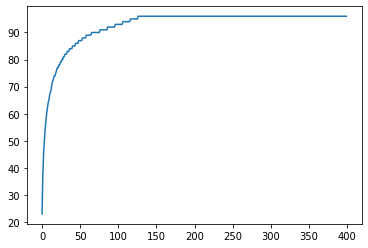

In [6]:
percent_variance = pca_images.explained_variance_ratio_
var=np.cumsum(np.round(pca_images.explained_variance_ratio_, decimals=3)*100)
sorted_values = (np.sort(var))
integer_values= sorted_values.astype(int)
print(integer_values)
plt.plot(integer_values)
plt.show()


# Plotting of top 5 eigen vectors

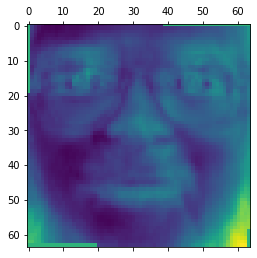

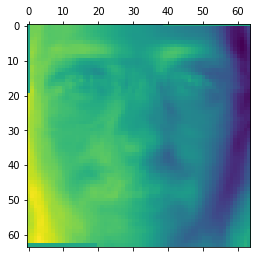

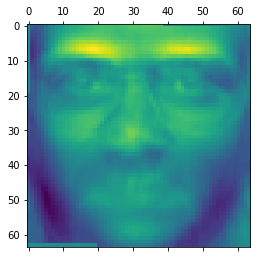

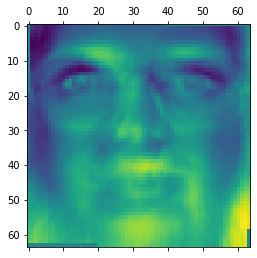

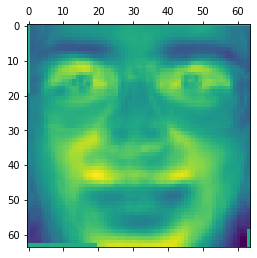

In [7]:
eigen_vector= pca_images.components_

#eigen_vector = np.sort(eigen_vector)[::-1]
pca_image_eigen_vector_1 = pca_images.components_[0].reshape(64,64)
rotated_img_1 = ndimage.rotate(pca_image_eigen_vector_1, 270)


pca_image_eigen_vector_2 = pca_images.components_[1].reshape(64,64)
rotated_img_2 = ndimage.rotate(pca_image_eigen_vector_2, 270)


pca_image_eigen_vector_3 = pca_images.components_[2].reshape(64,64)
rotated_img_3 = ndimage.rotate(pca_image_eigen_vector_3, 270)


pca_image_eigen_vector_4 = pca_images.components_[3].reshape(64,64)
rotated_img_4 = ndimage.rotate(pca_image_eigen_vector_4, 270)

pca_image_eigen_vector_5 = pca_images.components_[4].reshape(64,64)
rotated_img_5 = ndimage.rotate(pca_image_eigen_vector_5, 270)


plt.matshow(rotated_img_1)
plt.matshow(rotated_img_2)
plt.matshow(rotated_img_3)
plt.matshow(rotated_img_4)
plt.matshow(rotated_img_5)




# 100th image when number of pca components = 10

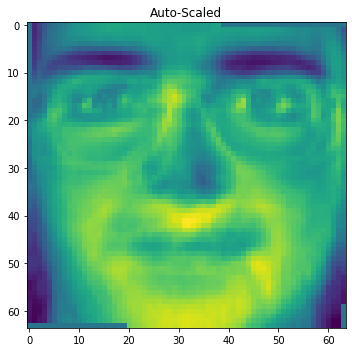

In [8]:
pca_100 = PCA(n_components=10)
pca = pca_100.fit_transform(imgs)
pca = pca_100.inverse_transform(pca_100.fit_transform(imgs))
#print(pca.shape)
pca_val_100 = pd.DataFrame(pca)
imgarray = np.array(pca_val_100.iloc[[99]])
reshape_100_image_10 = imgarray.reshape(64,64)
rotated_100_image_10 = ndimage.rotate(reshape_100_image_10, 270)
fig, (ax1) = plt.subplots(nrows=1, figsize=(5,5))
ax1.imshow(rotated_100_image_10, aspect="auto")
ax1.set_title("Auto-Scaled")
plt.tight_layout()
plt.show()

# 100th image when number of pca components = 100

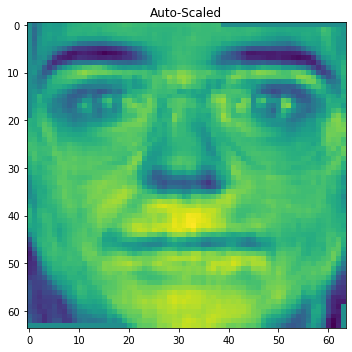

In [9]:
pca_100 = PCA(n_components=100)
pca = pca_100.fit_transform(imgs)
pca = pca_100.inverse_transform(pca_100.fit_transform(imgs))
#print(pca.shape)
pca_val_100 = pd.DataFrame(pca)
imgarray = np.array(pca_val_100.iloc[[99]])
reshape_100_image_100 = imgarray.reshape(64,64)
rotated_100_image_100 = ndimage.rotate(reshape_100_image_100, 270)
fig, (ax1) = plt.subplots(nrows=1, figsize=(5,5))
ax1.imshow(rotated_100_image_100, aspect="auto")
ax1.set_title("Auto-Scaled")
plt.tight_layout()
plt.show()

# 100th image when number of pca components = 200

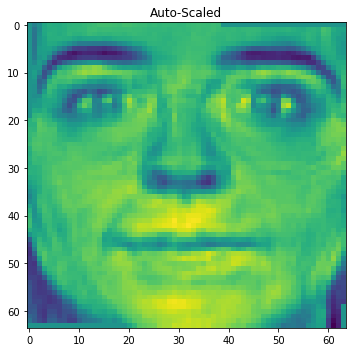

In [10]:
pca_100 = PCA(n_components=200)
pca = pca_100.fit_transform(imgs)
pca = pca_100.inverse_transform(pca_100.fit_transform(imgs))
#print(pca.shape)
pca_val_100 = pd.DataFrame(pca)
imgarray = np.array(pca_val_100.iloc[[99]])
reshape_100_image_200 = imgarray.reshape(64,64)
rotated_100_image_200 = ndimage.rotate(reshape_100_image_200, 270)
fig, (ax1) = plt.subplots(nrows=1, figsize=(5,5))
ax1.imshow(rotated_100_image_200, aspect="auto")
ax1.set_title("Auto-Scaled")
plt.tight_layout()
plt.show()

# 100th image when number of pca components = 399

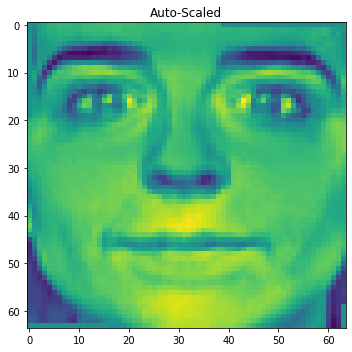

In [11]:
pca_100 = PCA(n_components=399)
pca = pca_100.fit_transform(imgs)
pca = pca_100.inverse_transform(pca_100.fit_transform(imgs))
#print(pca.shape)
pca_val_100 = pd.DataFrame(pca)
imgarray = np.array(pca_val_100.iloc[[99]])
reshape_100_image_399 = imgarray.reshape(64,64)
rotated_100_image_399 = ndimage.rotate(reshape_100_image_399, 270)
fig, (ax1) = plt.subplots(nrows=1, figsize=(5,5))
ax1.imshow(rotated_100_image_399, aspect="auto")
ax1.set_title("Auto-Scaled")
plt.tight_layout()
plt.show()